In [125]:
import pandas as pd
import numpy as np
import scipy as sp
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sharpe_portfolio_optimisation import MeanVarianceOptimisation

In [126]:
portfolioTickers = ['VUAG', 'VUKG', 'VMIG', 'VHYG', 'VERG', 'VFEG', 'VJPB']
portfolioTickers = [ticker + '.L' for ticker in portfolioTickers]

benchmarkTicker = 'VWRP.L'

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(3*365)

portfolioDf = yf.download(portfolioTickers,start=startDate,end=endDate,interval='1d')
portfolioDf = portfolioDf['Adj Close']

benchmarkDf = yf.download(benchmarkTicker,start=startDate,end=endDate)
benchmarkDf = benchmarkDf['Adj Close']

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


In [127]:
portfolioDf.describe()

Ticker,VERG.L,VFEG.L,VHYG.L,VJPB.L,VMIG.L,VUAG.L,VUKG.L
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,34.225314,44.776295,50.733464,22.908867,32.061764,67.093230,34.563110
std,3.169772,2.140659,3.349991,1.843783,2.604841,7.669684,3.681048
min,27.887501,39.907501,45.165001,19.722000,26.001448,55.000000,28.521042
25%,31.625000,43.097500,48.360001,21.412500,30.209963,61.404999,31.308928
50%,34.147499,44.320000,49.814999,22.584999,31.408501,64.135002,34.497063
75%,36.544998,46.412498,52.470001,24.587500,33.892323,72.504997,36.345203
max,40.222500,51.974998,58.924999,26.940001,38.045677,85.480003,42.410000


In [128]:
benchmarkDf.describe()

count    757.000000
mean      88.875971
std        8.094281
min       75.300003
25%       82.974998
50%       86.080002
75%       93.974998
max      108.040001
Name: Adj Close, dtype: float64

In [129]:
portfolioDf.dropna(inplace=True)
benchmarkDf.dropna(inplace=True)
portfolioCorrMatrix = portfolioDf.corr()

Compare with times of market stress / risk-on events

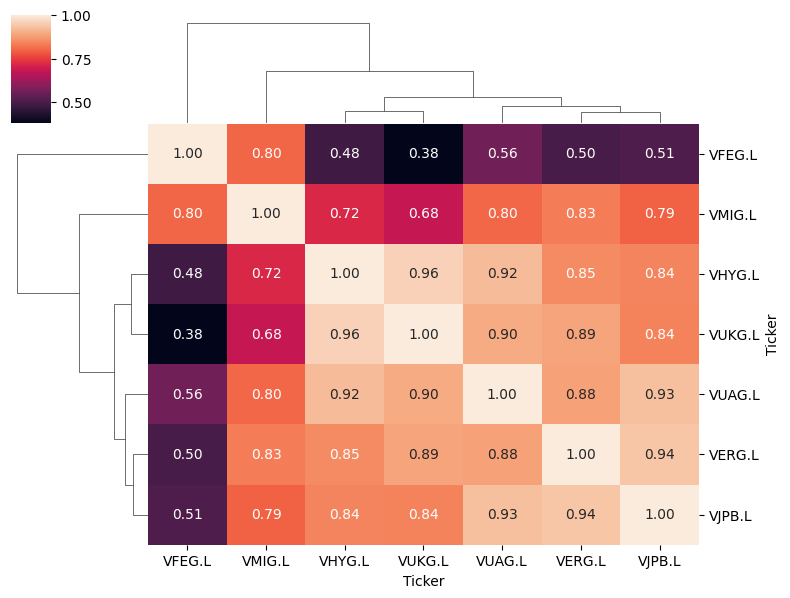

In [130]:
sns.clustermap(portfolioCorrMatrix, annot=True, fmt=".2f", figsize=(8,6))

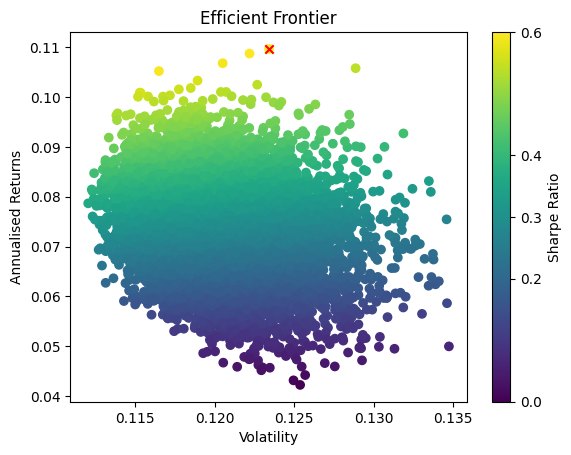

In [131]:
optimised = MeanVarianceOptimisation(portfolioDf.pct_change().dropna())
optimised.generatePortfolios()
optimised.plot()

In [132]:
optimised.getWeights()

VERG.L: 15.3%
VFEG.L: 0.1%
VHYG.L: 3.6%
VJPB.L: 3.3%
VMIG.L: 0.8%
VUAG.L: 35.6%
VUKG.L: 41.2%
